In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
# Load the dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Set display options for clarity
pd.set_option('display.max_columns', None)

# Load UFO data
df = pd.read_csv('/content/drive/MyDrive/UFO/scrubbed_data.csv')
df.head()


<ipython-input-2-fea0e14dcd06>:11: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/UFO/scrubbed_data.csv')


,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


In [3]:
# Convert date column to datetime
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')

# Drop rows with invalid dates
df = df.dropna(subset=['datetime'])

# Extract temporal features
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day_of_week'] = df['datetime'].dt.day_name()
df['hour'] = df['datetime'].dt.hour

<ipython-input-3-e4cf385b255e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['datetime'].dt.year
<ipython-input-3-e4cf385b255e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['datetime'].dt.month
<ipython-input-3-e4cf385b255e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

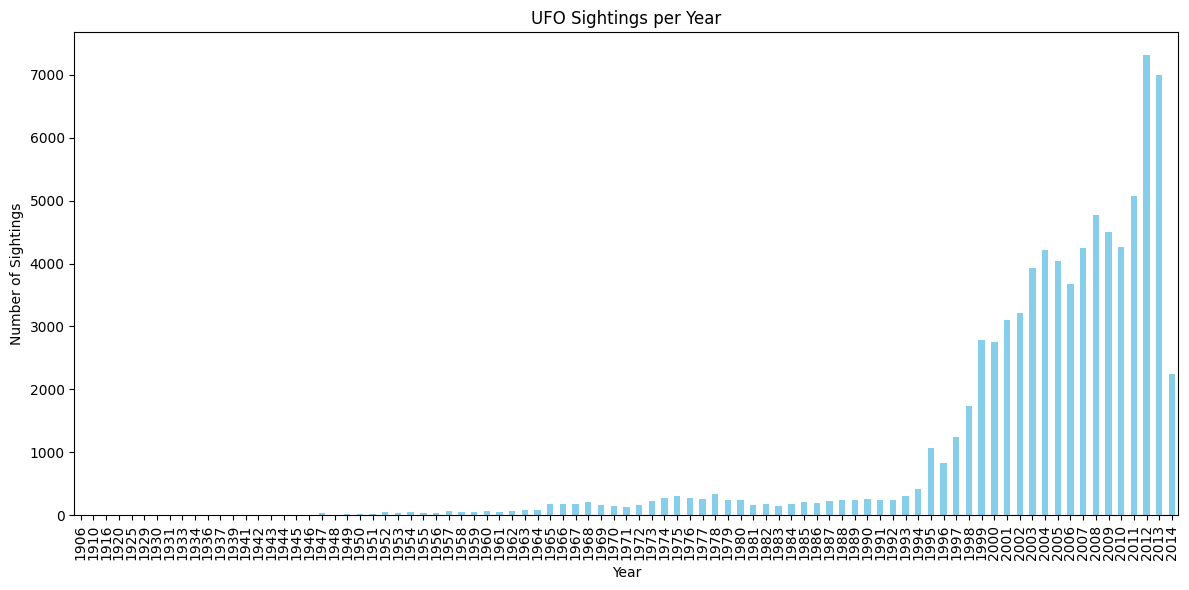

In [4]:
# Plot: Number of UFO sightings per year
plt.figure(figsize=(12, 6))
df['year'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('UFO Sightings per Year')
plt.xlabel('Year')
plt.ylabel('Number of Sightings')
# plt.grid(True)
plt.tight_layout()
plt.show()

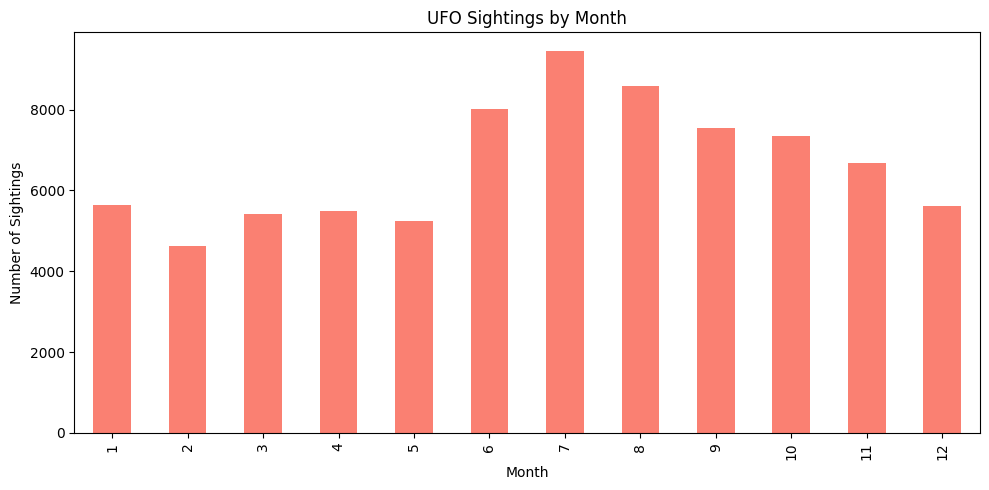

In [5]:
# Plot: Number of sightings per month
plt.figure(figsize=(10, 5))
df['month'].value_counts().sort_index().plot(kind='bar', color='salmon')
plt.title('UFO Sightings by Month')
plt.xlabel('Month')
plt.ylabel('Number of Sightings')
# plt.grid(True)
plt.tight_layout()
plt.show()

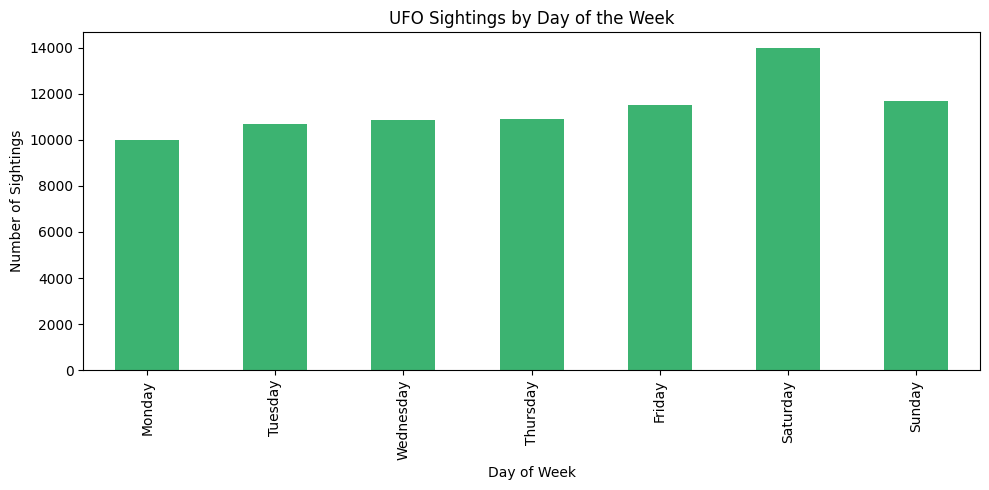

In [6]:
# Plot: Number of sightings by day of week
plt.figure(figsize=(10, 5))
df['day_of_week'].value_counts().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
]).plot(kind='bar', color='mediumseagreen')
plt.title('UFO Sightings by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Sightings')
# plt.grid(True)
plt.tight_layout()
plt.show()

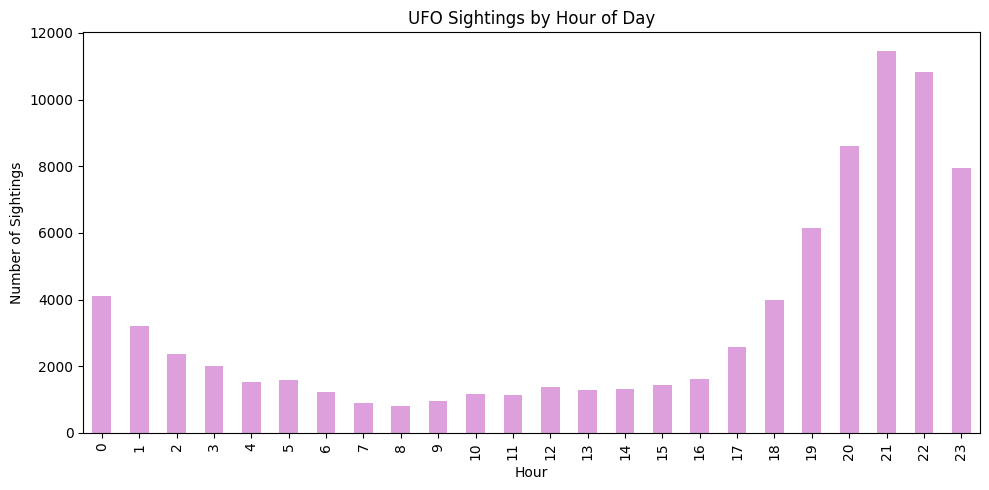

In [7]:
# Plot: Sightings by hour of day
plt.figure(figsize=(10, 5))
df['hour'].value_counts().sort_index().plot(kind='bar', color='plum')
plt.title('UFO Sightings by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Sightings')
# plt.grid(True)
plt.tight_layout()
plt.show()

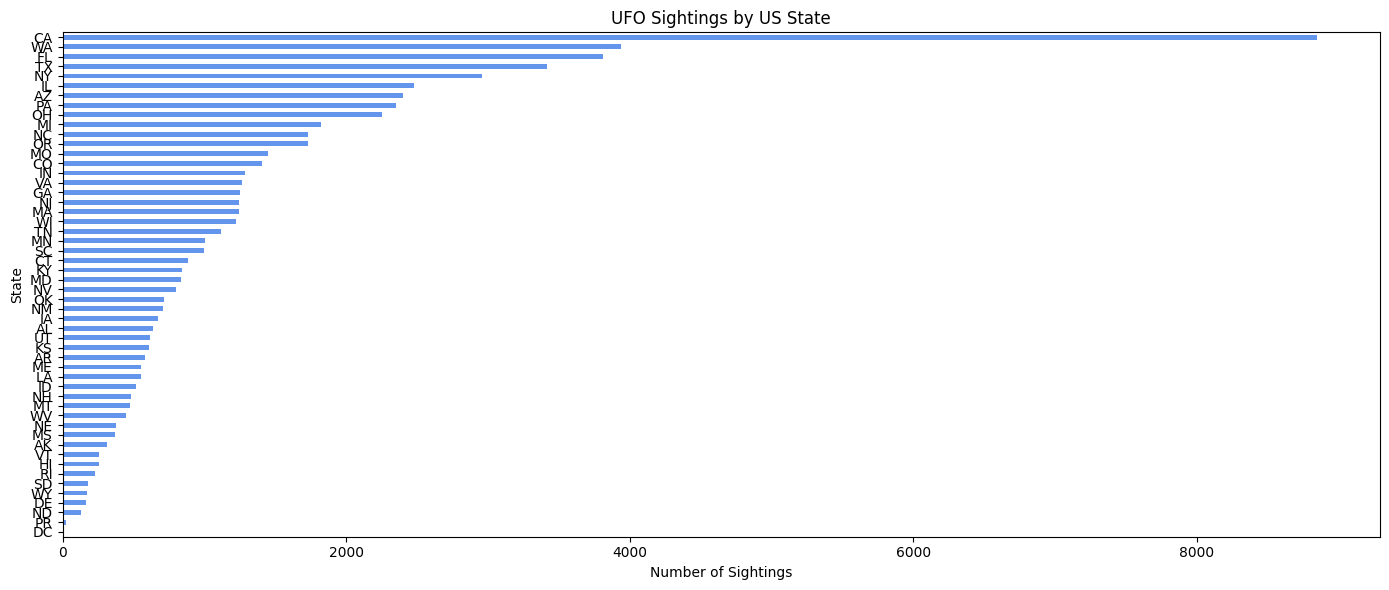

In [8]:
# Clean location data for state-wise heatmap
# Only keep US states
df_us = df[df['country'] == 'us']

# Drop NA states
df_us = df_us.dropna(subset=['state'])

# Uppercase state codes
df_us['state'] = df_us['state'].str.upper()

# Plot: Sightings by US state
plt.figure(figsize=(14, 6))
df_us['state'].value_counts().sort_values().plot(kind='barh', color='cornflowerblue')
plt.title('UFO Sightings by US State')
plt.xlabel('Number of Sightings')
plt.ylabel('State')
plt.tight_layout()
plt.show()

In [9]:
# Optional: Interactive map using Plotly (requires lat/lon data)
df_map = df_us.dropna(subset=['latitude', 'longitude '])
df_map['latitude'] = pd.to_numeric(df_map['latitude'], errors='coerce')
df_map['longitude '] = pd.to_numeric(df_map['longitude '], errors='coerce')
df_map = df_map.dropna(subset=['latitude', 'longitude '])

fig = px.density_mapbox(
    df_map,
    lat='latitude',
    lon='longitude ',
    z=None,
    radius=5,
    center=dict(lat=37.0902, lon=-95.7129),
    zoom=3,
    mapbox_style="stamen-terrain",
    title="UFO Sightings Heatmap (USA)"
)
fig.show()

# Advanced Spatiotemporal Analysis

## 1. Time Series Decomposition (Seasonal + Trend + Residual)
Goal: Separate long-term trends, seasonal patterns (e.g., summer spikes), and noise.

In [10]:
# Ensure datetime is actually in datetime format
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')

# Drop any rows where datetime is still invalid
df = df.dropna(subset=['datetime'])


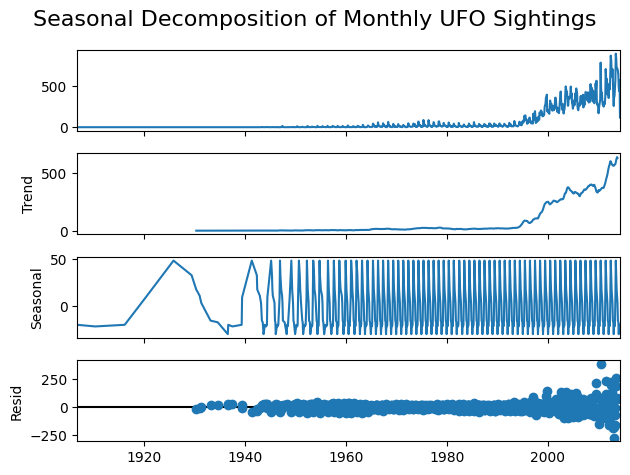

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

sightings_ts = df.groupby(df['datetime'].dt.to_period('M')).size()
sightings_ts.index = sightings_ts.index.to_timestamp()

result = seasonal_decompose(sightings_ts, model='additive', period=12)
result.plot()
plt.suptitle('Seasonal Decomposition of Monthly UFO Sightings', fontsize=16)
plt.tight_layout()
plt.show()


##  2. Spatiotemporal Heatmaps (Sightings by Year × State)
Goal: See how sightings vary across time for each region.

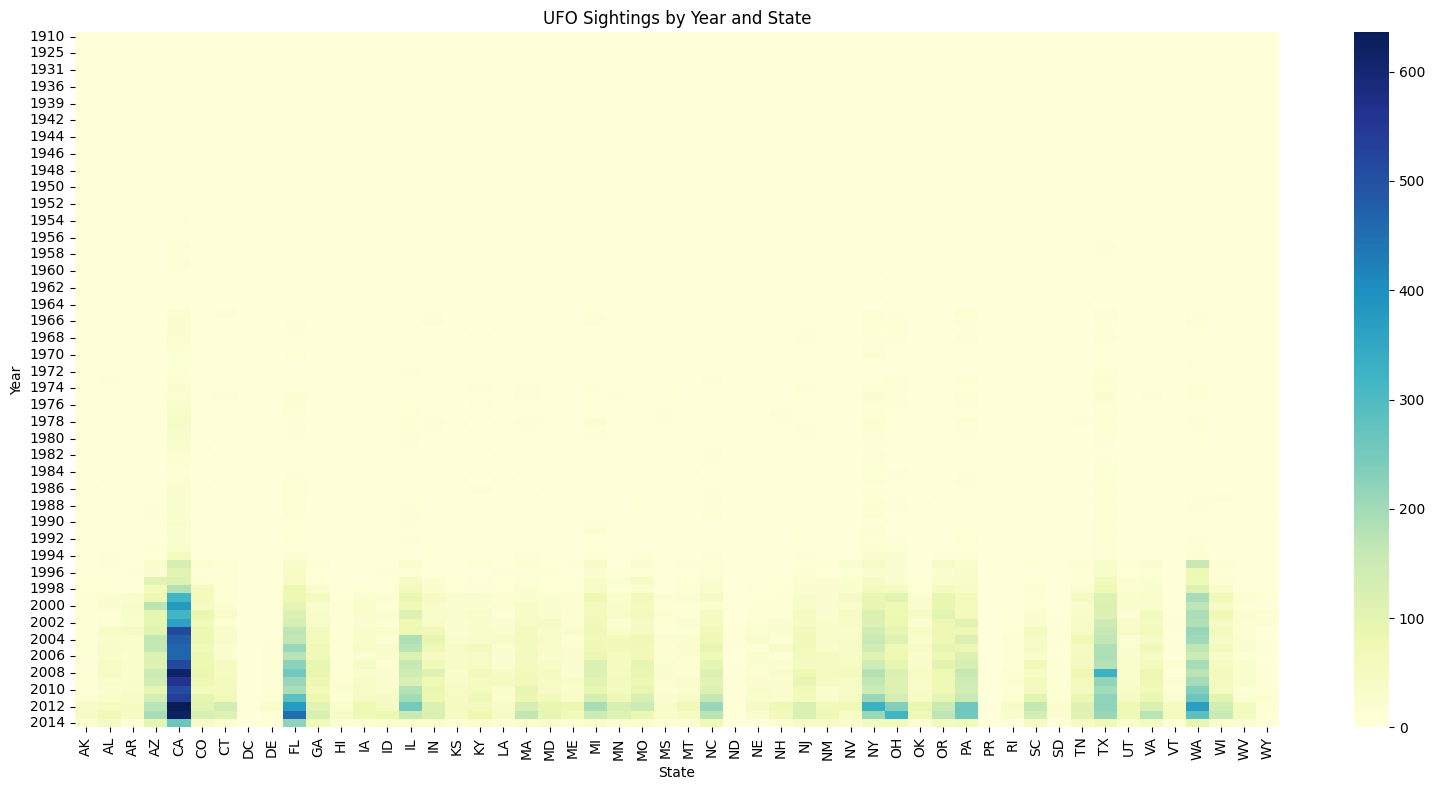

In [12]:
import seaborn as sns

heatmap_data = df_us.groupby(['year', 'state']).size().unstack(fill_value=0)
plt.figure(figsize=(16, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu")
plt.title("UFO Sightings by Year and State")
plt.xlabel("State")
plt.ylabel("Year")
plt.tight_layout()
plt.show()


##  3. Growth Rate Analysis (Where sightings are accelerating)

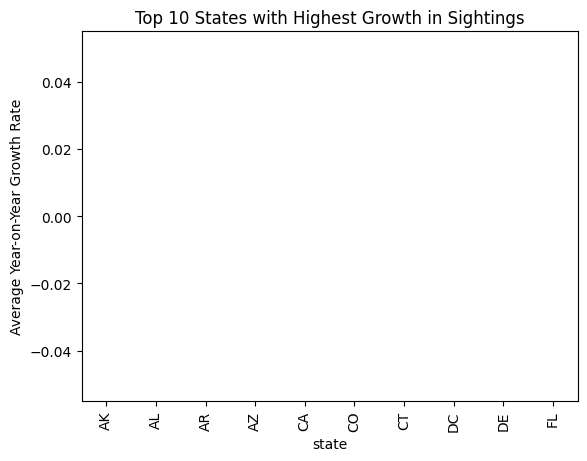

In [13]:
state_year = df_us.groupby(['year', 'state']).size().reset_index(name='sightings')
pivot = state_year.pivot(index='year', columns='state', values='sightings').fillna(0)
growth_rate = pivot.pct_change().mean().sort_values(ascending=False)

growth_rate.head(10).plot(kind='bar', title="Top 10 States with Highest Growth in Sightings")
plt.ylabel("Average Year-on-Year Growth Rate")
plt.show()


## 4. Anomaly Detection in Temporal Sightings
Use z-scores or moving averages to identify years or months with unexpected spikes.

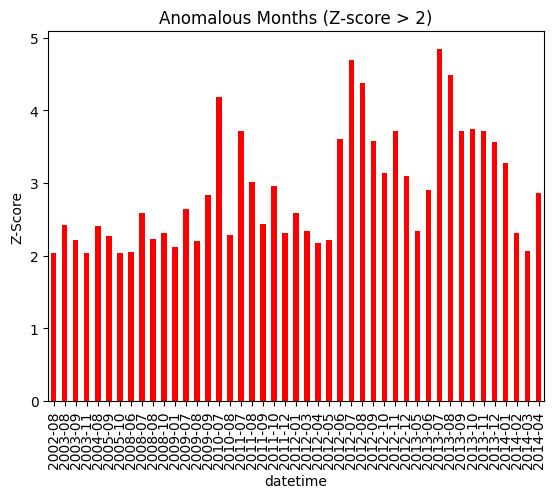

In [14]:
monthly_counts = df['datetime'].dt.to_period('M').value_counts().sort_index()
z_scores = (monthly_counts - monthly_counts.mean()) / monthly_counts.std()
anomalies = z_scores[abs(z_scores) > 2]

anomalies.plot(kind='bar', color='red', title='Anomalous Months (Z-score > 2)')
plt.ylabel("Z-Score")
plt.show()


## 5. Cold vs Hot Regions Over Time (Geospatial Shift)
Map how the center of gravity of sightings shifts over time:

Compute mean lat/lon per year

Animate/map them over time

In [15]:
center_per_year = df_map.groupby(df_map['year'])[['latitude', 'longitude ']].mean()

fig = px.line_geo(center_per_year.reset_index(),
                  lat='latitude', lon='longitude ',
                  locations=None,
                  projection="natural earth",
                  title='Geographical Center of UFO Sightings Over Time')
fig.show()


## 6. Clustering by Location + Time
Use DBSCAN or KMeans on (latitude, longitude, timestamp) to find dense clusters of sightings

In [16]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np

coords_time = df_map[['latitude', 'longitude ']].copy()
coords_time['timestamp'] = df_map['datetime'].astype('int64') // 10**9
X = StandardScaler().fit_transform(coords_time)

db = DBSCAN(eps=0.5, min_samples=10).fit(X)
df_map['cluster'] = db.labels_

px.scatter_geo(df_map, lat='latitude', lon='longitude ', color='cluster',
               title="Spatiotemporal Clusters of UFO Sightings (DBSCAN)")


## 7. Airport Location Correlation
Analyzing the correlation between UFO sightings and airport locations. We'll use a comprehensive dataset of U.S. airports and compute the distance from each UFO sighting to the nearest airport. This analysis can help determine if there's a spatial relationship between UFO sightings and proximity to airports.

In [17]:
import pandas as pd

# Load the airport dataset
airport_df = pd.read_csv('/content/drive/MyDrive/UFO/airports.csv')

# Display the first few rows
airport_df.head()


,id,ident,type,name,latitude,longitude,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,icao_code,iata_code,gps_code,local_code,home_link,wikipedia_link,keywords
0,6523,00A,heliport,Total RF Heliport,40.070985,-74.933689,11.0,NaN,US,US-PA,Bensalem,no,NaN,NaN,K00A,00A,https://www.penndot.pa.gov/TravelInPA/airports...,NaN,NaN
1,323361,00AA,small_airport,Aero B Ranch Airport,38.704022,-101.473911,3435.0,NaN,US,US-KS,Leoti,no,NaN,NaN,00AA,00AA,NaN,NaN,NaN
2,6524,00AK,small_airport,Lowell Field,59.947733,-151.692524,450.0,NaN,US,US-AK,Anchor Point,no,NaN,NaN,00AK,00AK,NaN,NaN,NaN
3,6525,00AL,small_airport,Epps Airpark,34.864799,-86.770302,820.0,NaN,US,US-AL,Harvest,no,NaN,NaN,00AL,00AL,NaN,NaN,NaN
4,506791,00AN,small_airport,Katmai Lodge Airport,59.093287,-156.456699,80.0,NaN,US,US-AK,King Salmon,no,NaN,NaN,00AN,00AN,NaN,NaN,NaN


In [18]:
# Convert latitude and longitude to numeric values
df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')
df['longitude '] = pd.to_numeric(df['longitude '], errors='coerce')

# Drop rows with missing or invalid coordinates
df = df.dropna(subset=['latitude', 'longitude '])


In [ ]:
from geopy.distance import geodesic
import numpy as np

# Function to compute the distance to the nearest airport
def compute_nearest_airport_distance(sighting_coords, airport_coords):
    distances = airport_coords.apply(lambda x: geodesic(sighting_coords, (x['latitude'], x['longitude'])).km, axis=1)
    return distances.min()

# Apply the function to each UFO sighting
df['distance_to_nearest_airport_km'] = df.apply(lambda row: compute_nearest_airport_distance((row['latitude'], row['longitude ']), airport_df), axis=1)


In [ ]:
import matplotlib.pyplot as plt

# Plot the distribution of distances
plt.figure(figsize=(10, 6))
plt.hist(df['distance_to_nearest_airport_km'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Distances to Nearest Airport')
plt.xlabel('Distance to Nearest Airport (km)')
plt.ylabel('Number of UFO Sightings')
plt.grid(True)
plt.show()
